In [38]:
#Progressive pass is basically the pass that moves you 25% more towards the goal
#open-play progressive passes consistently create 40% of all goals scored in all professional leagues
# progressive passes that become key passes -- passes that directly lead to a shot or goal.
#read more on this topic over here https://www.americansocceranalysis.com/home/2021/2/25/where-goals-come-from-the-five-progressive-passes

#packages
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as  plt 
from mplsoccer import Pitch

In [39]:
#dataset
df = pd.read_csv('europaFinal.csv')

In [40]:
df.head(15)

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,0,0.0,Manchester United,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
1,0,0.0,Villarreal,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5
5,0,34.0,Villarreal,35.1,9.1,FirstHalf,Pass,Successful,7.0,31.9,2.3
6,0,35.0,Villarreal,33.6,2.6,FirstHalf,TakeOn,Unsuccessful,8.0,NaN,NaN
7,0,35.0,Manchester United,66.4,97.4,FirstHalf,Tackle,Successful,10.0,NaN,NaN
8,0,52.0,Villarreal,34.2,0.0,FirstHalf,Pass,Successful,8.0,35.0,10.6
9,0,54.0,Villarreal,34.1,14.0,FirstHalf,Pass,Successful,5.0,31.3,37.4


In [41]:
#filter the data 
df = df.loc[df['teamId']=='Villarreal']
df.head(10)

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
1,0,0.0,Villarreal,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5
5,0,34.0,Villarreal,35.1,9.1,FirstHalf,Pass,Successful,7.0,31.9,2.3
6,0,35.0,Villarreal,33.6,2.6,FirstHalf,TakeOn,Unsuccessful,8.0,NaN,NaN
8,0,52.0,Villarreal,34.2,0.0,FirstHalf,Pass,Successful,8.0,35.0,10.6
9,0,54.0,Villarreal,34.1,14.0,FirstHalf,Pass,Successful,5.0,31.3,37.4
10,0,55.0,Villarreal,30.0,53.3,FirstHalf,Foul,Successful,14.0,NaN,NaN
12,1,5.0,Villarreal,26.1,65.7,FirstHalf,Pass,Successful,4.0,34.0,87.1
13,1,10.0,Villarreal,33.3,87.1,FirstHalf,Pass,Successful,24.0,21.9,75.7
14,1,14.0,Villarreal,26.6,76.6,FirstHalf,Pass,Successful,4.0,24.1,5.9


In [42]:
#filtering the passing type
df = df.loc[df['type']=='Pass']
df.head()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5
5,0,34.0,Villarreal,35.1,9.1,FirstHalf,Pass,Successful,7.0,31.9,2.3
8,0,52.0,Villarreal,34.2,0.0,FirstHalf,Pass,Successful,8.0,35.0,10.6
9,0,54.0,Villarreal,34.1,14.0,FirstHalf,Pass,Successful,5.0,31.3,37.4
12,1,5.0,Villarreal,26.1,65.7,FirstHalf,Pass,Successful,4.0,34.0,87.1


In [43]:
#filtering out dani parejo stats (MID)
df = df.loc[df['playerId']==8.0].reset_index()
df.head()

,index,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5
1,8,0,52.0,Villarreal,34.2,0.0,FirstHalf,Pass,Successful,8.0,35.0,10.6
2,15,1,19.0,Villarreal,28.6,5.9,FirstHalf,Pass,Successful,8.0,43.0,4.1
3,26,1,52.0,Villarreal,46.4,10.9,FirstHalf,Pass,Successful,8.0,57.4,2.5
4,37,2,10.0,Villarreal,36.6,4.8,FirstHalf,Pass,Successful,8.0,43.7,8.3


In [44]:
#filter and adding a new column

df = df.loc[df['progressive']==True].reset_index

KeyError: 'progressive'

In [45]:
#cleaning the data
df.x = df.x*1.2
df.y = df.y*.8
df.endX = df.endX*1.2
df.endY = df.endY*1.2

In [46]:
#calculating the distance 
df['beginning'] = np.sqrt(np.square(120-df['x']) + np.square(40 - df['y']))
df['end'] = np.sqrt(np.square(120 - df['endX']) + np.square(40 - df['endY']))

df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]

In [47]:
df.head()

,index,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,beginning,end,progressive
0,4,0,32.0,Villarreal,41.28,0.00,FirstHalf,Pass,Successful,8.0,43.80,11.40,88.299708,81.390417,False
1,8,0,52.0,Villarreal,41.04,0.00,FirstHalf,Pass,Successful,8.0,42.00,12.72,88.513737,82.632914,False
2,15,1,19.0,Villarreal,34.32,4.72,FirstHalf,Pass,Successful,8.0,51.60,4.92,92.659273,76.871103,False
3,26,1,52.0,Villarreal,55.68,8.72,FirstHalf,Pass,Successful,8.0,68.88,3.00,71.522729,63.105106,False
4,37,2,10.0,Villarreal,43.92,3.84,FirstHalf,Pass,Successful,8.0,52.44,9.96,84.236049,73.937509,False


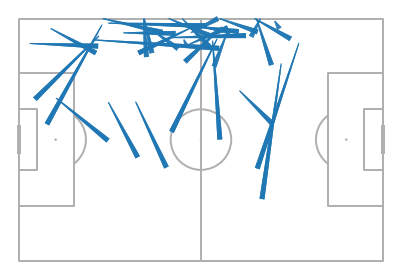

In [48]:
#creating pitch
pitch = Pitch(pitch_type='statsbomb')
fig,ax = pitch.draw()

pitch.lines(df.x,df.y,df.endX,df.endY,comet=True,ax=ax)